<a href="https://colab.research.google.com/github/nehayoges/decision-tree/blob/main/Bicubic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image loaded successfully!


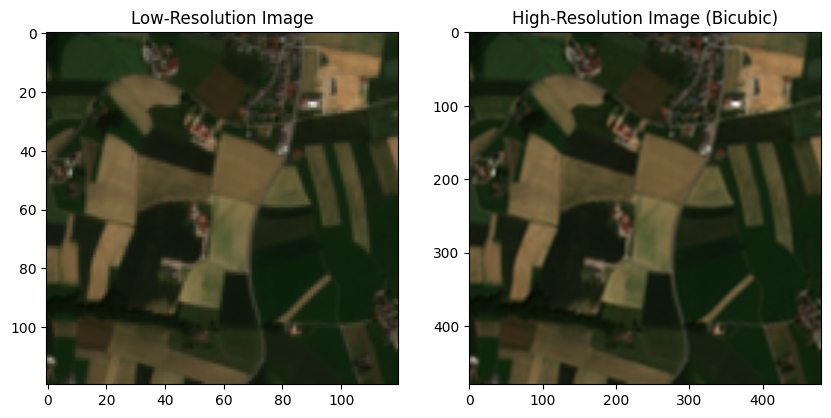

PSNR: 55.065157291879856
SSIM: 0.9979540589271886
MSE: 0.20256510416666668
High-resolution image saved at /content/drive/My Drive/Output/upscaled_image_bicubic.png


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import os
from google.colab import drive

# lr = low resolution
# output = high resolution

# mount Google Drive
drive.mount('/content/drive')

# perform bicubic interpolation
def bicubic_interpolation(lr_image, scale=4):
    # get the size of the new high-resolution image (output image)
    output_size = (lr_image.shape[1] * scale, lr_image.shape[0] * scale)

    # use bicubic interpolation
    output_image = cv2.resize(lr_image, output_size, interpolation=cv2.INTER_CUBIC)
    return output_image

# define the image path correctly with Google Drive path
lr_image_path = '/content/drive/My Drive/LR Images/LRIMAGE 1.png'

# make sure the image is loaded correctly
lr_image = cv2.imread(lr_image_path)
if lr_image is None:
    print(f"Error: Unable to load image at {lr_image_path}")
else:
    print("Image loaded successfully!")

    # perform bicubic interpolation
    output_image = bicubic_interpolation(lr_image)

    # display images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(lr_image, cv2.COLOR_BGR2RGB))
    plt.title('Low-Resolution Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('High-Resolution Image (Bicubic)')

    plt.show()

    # change images to grayscale for PSNR, SSIM, and MSE evaluation
    lr_image_gray = cv2.cvtColor(lr_image, cv2.COLOR_BGR2GRAY)
    output_image_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

    # resize the low-resolution image to match the size of the high-resolution (output) image
    lr_image_resized = cv2.resize(lr_image_gray, (output_image_gray.shape[1], output_image_gray.shape[0]), interpolation=cv2.INTER_CUBIC)

    # compute PSNR and SSIM using the resized low-resolution image and high-resolution image
    psnr_value = peak_signal_noise_ratio(lr_image_resized, output_image_gray)
    ssim_value = structural_similarity(lr_image_resized, output_image_gray)

    # calculate MSE
    mse_value = np.mean((lr_image_resized - output_image_gray) ** 2)

    print(f"PSNR: {psnr_value}")
    print(f"SSIM: {ssim_value}")
    print(f"MSE: {mse_value}")

    # output folder and path in Google Drive
    output_folder = '/content/drive/My Drive/Output'

    # full output path (output_folder + filename)
    output_path = os.path.join(output_folder, 'upscaled_image_bicubic.png')

    # make sure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create the folder if it doesn't exist

    # Save upscaled image at the output_path (in Google Drive)
    save_success = cv2.imwrite(output_path, output_image)
    if save_success:
        print(f"High-resolution image saved at {output_path}")
    else:
        print(f"Error: Unable to save image at {output_path}")
